In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA

<b>Reading the data</b>

In [44]:
data = pd.read_csv('data/Electric Blower.csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,TxnDate,TxnTime,Consumption
0,0,76229,01 Jan 2022,16:55:52,1.010
1,1,76258,01 Jan 2022,21:45:29,0.908
2,2,76287,01 Jan 2022,12:24:52,0.926
3,3,76316,01 Jan 2022,04:07:36,0.928
4,4,76345,01 Jan 2022,06:52:25,0.916


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3606 entries, 0 to 3605
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  3606 non-null   int64  
 1   Unnamed: 0    3606 non-null   int64  
 2   TxnDate       3606 non-null   object 
 3   TxnTime       3606 non-null   object 
 4   Consumption   3606 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 141.0+ KB


In [46]:
data.shape

(3606, 5)

<b>Data Cleaning and Preprocessing</b>

In [47]:
data.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)

data.head()

,TxnDate,TxnTime,Consumption
0,01 Jan 2022,16:55:52,1.010
1,01 Jan 2022,21:45:29,0.908
2,01 Jan 2022,12:24:52,0.926
3,01 Jan 2022,04:07:36,0.928
4,01 Jan 2022,06:52:25,0.916


<p>In the above data, TxnDate and TxnTime are of object datatype. Combine both the columns and convert to datetime</p>

In [48]:
data['Datetime'] = pd.to_datetime(data.iloc[:,0] + ' ' + data.iloc[:,1])

In [49]:
data.set_index('Datetime',inplace=True)

data.head()

,TxnDate,TxnTime,Consumption
Datetime,,,
2022-01-01 16:55:52,01 Jan 2022,16:55:52,1.010
2022-01-01 21:45:29,01 Jan 2022,21:45:29,0.908
2022-01-01 12:24:52,01 Jan 2022,12:24:52,0.926
2022-01-01 04:07:36,01 Jan 2022,04:07:36,0.928
2022-01-01 06:52:25,01 Jan 2022,06:52:25,0.916


In [50]:
data.drop(columns=['TxnDate','TxnTime'],inplace=True)

In [51]:
data.head()

,Consumption
Datetime,
2022-01-01 16:55:52,1.010
2022-01-01 21:45:29,0.908
2022-01-01 12:24:52,0.926
2022-01-01 04:07:36,0.928
2022-01-01 06:52:25,0.916


In [52]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [53]:
data = data.sort_index()    # Sort according to the index

In [54]:
data.isnull().sum()     # Check for null values

Consumption    0
dtype: int64

<b>Exploratory Data Analysis</b>

In [ ]:
sns.set()

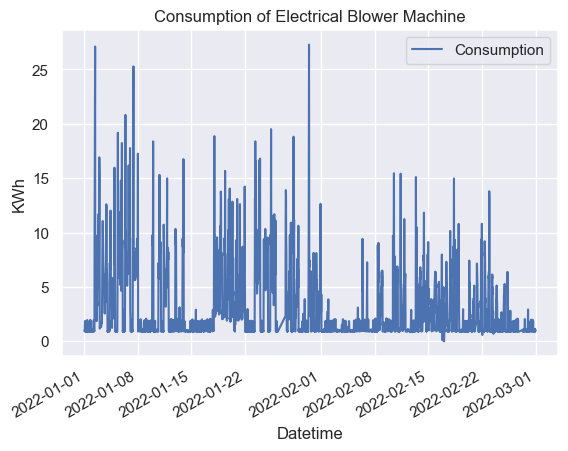

In [69]:
data.plot(title='Consumption of Electrical Blower Machine',ylabel='KWh');

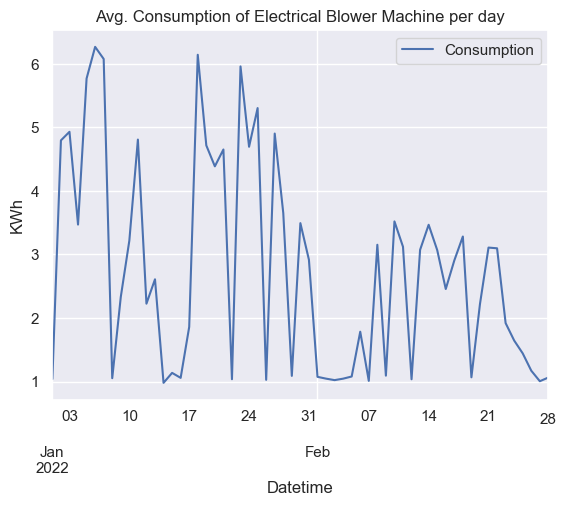

In [70]:
data.resample('D').mean().plot(title='Avg. Consumption of Electrical Blower Machine per day',ylabel='KWh');       # Group the data by date and plot it

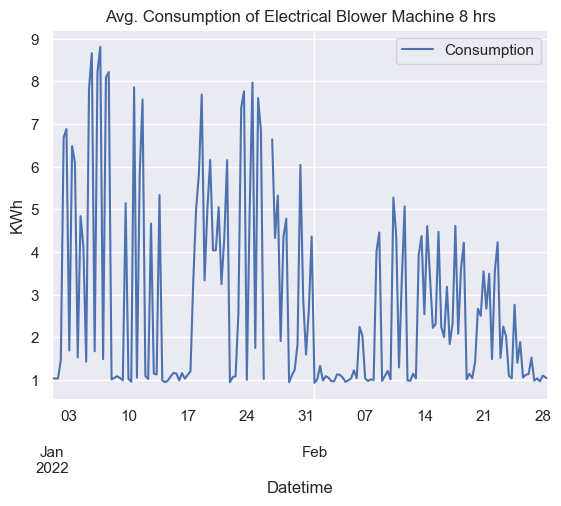

In [71]:
data.resample('8h').mean().plot(title='Avg. Consumption of Electrical Blower Machine 8 hrs',ylabel='KWh');      # Group the data for 8hrs and plot it

In [ ]:
# Plot the consumption of electricity for a day in every month
# Plot a seasonal plot of consumption of electricity
# 

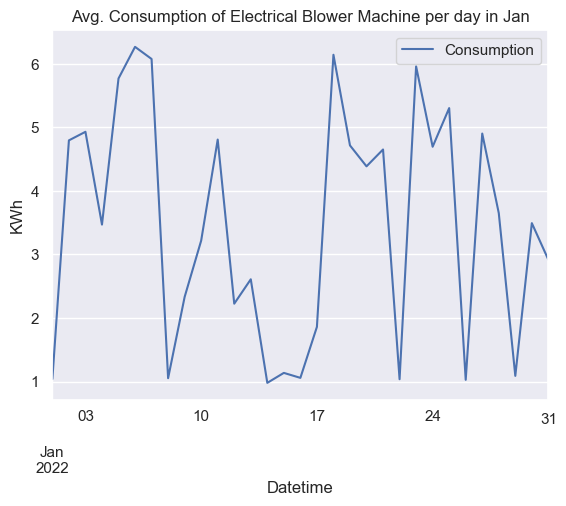

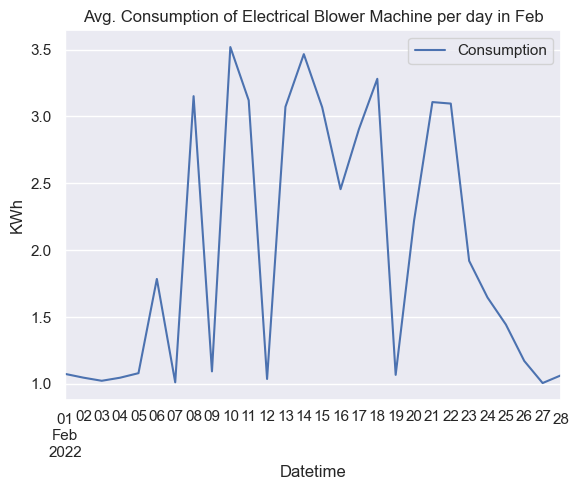

In [86]:
data.resample('D').mean().loc['2022-01'].plot(title='Avg. Consumption of Electrical Blower Machine per day in Jan',ylabel='KWh')
data.resample('D').mean().loc['2022-02'].plot(title='Avg. Consumption of Electrical Blower Machine per day in Feb',ylabel='KWh');

In [93]:
# From the above graphs, we observe that the mean consumption of Electric Machine per day is highest in January (6.2KWh). But in Febuary, the mean consumption per day is reduced to 3.5KWh.

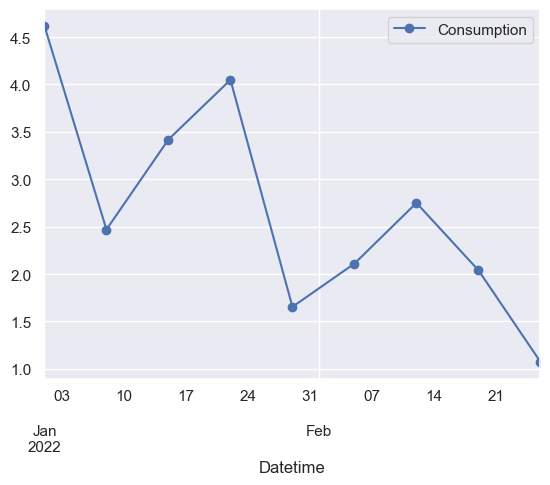

In [ ]:
data.resample('7D').mean().plot(marker='o');

In [118]:
df = data.copy()
df = df.resample('D').mean()

In [137]:
df['Day'] = df.index.day

In [139]:
df

,Consumption,Day
Datetime,,
2022-01-01,1.039079,1
2022-01-02,4.793750,2
2022-01-03,4.928458,3
2022-01-04,3.469063,4
2022-01-05,5.767121,5
2022-01-06,6.265062,6
2022-01-07,6.074406,7
2022-01-08,1.052323,8
2022-01-09,2.330952,9
